In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=32

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475305, 32, 16)
strides:  (4096, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x27d3a345040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475305,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x27dae3f3040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380244

In [9]:
training_sample

380244

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380244, 32, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380244,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380244, 32, 15) (380244, 1) (95061, 32, 15) (95061, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='MeanSquaredError', optimizer='sgd',metrics=['AUC'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 32, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=375,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/375
2971/2971 [==============================] - 76s 21ms/step - loss: 0.1929 - auc: 0.4872 - val_loss: 0.1860 - val_auc: 0.5639
Epoch 2/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1923 - auc: 0.5772 - val_loss: 0.1854 - val_auc: 0.6354
Epoch 3/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1915 - auc: 0.6335 - val_loss: 0.1845 - val_auc: 0.6646
Epoch 4/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1898 - auc: 0.6599 - val_loss: 0.1821 - val_auc: 0.6758
Epoch 5/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1857 - auc: 0.6761 - val_loss: 0.1772 - val_auc: 0.6838
Epoch 6/375
2971/2971 [==============================] - 57s 19ms/step - loss: 0.1799 - auc: 0.6889 - val_loss: 0.1721 - val_auc: 0.6991
Epoch 7/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1755 - auc: 0.7068 - val_loss: 0.1682 - val_auc: 0.7179
Epoch 8/375
2971/2971 [==================

2971/2971 [==============================] - 58s 20ms/step - loss: 0.1545 - auc: 0.7909 - val_loss: 0.1522 - val_auc: 0.7841
Epoch 61/375
2971/2971 [==============================] - 58s 19ms/step - loss: 0.1544 - auc: 0.7914 - val_loss: 0.1522 - val_auc: 0.7898
Epoch 62/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1543 - auc: 0.7918 - val_loss: 0.1509 - val_auc: 0.7890
Epoch 63/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1541 - auc: 0.7923 - val_loss: 0.1517 - val_auc: 0.7894
Epoch 64/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1540 - auc: 0.7928 - val_loss: 0.1506 - val_auc: 0.7898
Epoch 65/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1539 - auc: 0.7929 - val_loss: 0.1503 - val_auc: 0.7907
Epoch 66/375
2971/2971 [==============================] - 58s 19ms/step - loss: 0.1538 - auc: 0.7933 - val_loss: 0.1503 - val_auc: 0.7908
Epoch 67/375
2971/2971 [=======================

2971/2971 [==============================] - 60s 20ms/step - loss: 0.1487 - auc: 0.8098 - val_loss: 0.1463 - val_auc: 0.8062
Epoch 120/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1486 - auc: 0.8103 - val_loss: 0.1465 - val_auc: 0.8046
Epoch 121/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1486 - auc: 0.8104 - val_loss: 0.1467 - val_auc: 0.8067
Epoch 122/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1485 - auc: 0.8108 - val_loss: 0.1466 - val_auc: 0.8052
Epoch 123/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1484 - auc: 0.8111 - val_loss: 0.1463 - val_auc: 0.8062
Epoch 124/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1482 - auc: 0.8115 - val_loss: 0.1461 - val_auc: 0.8058
Epoch 125/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1482 - auc: 0.8117 - val_loss: 0.1469 - val_auc: 0.8057
Epoch 126/375
2971/2971 [================

2971/2971 [==============================] - 59s 20ms/step - loss: 0.1453 - auc: 0.8204 - val_loss: 0.1443 - val_auc: 0.8121
Epoch 179/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1453 - auc: 0.8204 - val_loss: 0.1442 - val_auc: 0.8122
Epoch 180/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1453 - auc: 0.8206 - val_loss: 0.1437 - val_auc: 0.8142
Epoch 181/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1452 - auc: 0.8206 - val_loss: 0.1443 - val_auc: 0.8118
Epoch 182/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1452 - auc: 0.8208 - val_loss: 0.1444 - val_auc: 0.8118
Epoch 183/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1452 - auc: 0.8208 - val_loss: 0.1441 - val_auc: 0.8124
Epoch 184/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1451 - auc: 0.8209 - val_loss: 0.1440 - val_auc: 0.8133
Epoch 185/375
2971/2971 [================

2971/2971 [==============================] - 60s 20ms/step - loss: 0.1438 - auc: 0.8248 - val_loss: 0.1440 - val_auc: 0.8127
Epoch 238/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1438 - auc: 0.8248 - val_loss: 0.1432 - val_auc: 0.8173
Epoch 239/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1438 - auc: 0.8249 - val_loss: 0.1435 - val_auc: 0.8158
Epoch 240/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1438 - auc: 0.8249 - val_loss: 0.1432 - val_auc: 0.8159
Epoch 241/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1437 - auc: 0.8250 - val_loss: 0.1425 - val_auc: 0.8179
Epoch 242/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1437 - auc: 0.8251 - val_loss: 0.1437 - val_auc: 0.8170
Epoch 243/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1437 - auc: 0.8252 - val_loss: 0.1428 - val_auc: 0.8166
Epoch 244/375
2971/2971 [================

2971/2971 [==============================] - 58s 20ms/step - loss: 0.1427 - auc: 0.8281 - val_loss: 0.1423 - val_auc: 0.8187
Epoch 297/375
2971/2971 [==============================] - 58s 19ms/step - loss: 0.1427 - auc: 0.8281 - val_loss: 0.1427 - val_auc: 0.8168
Epoch 298/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1426 - auc: 0.8283 - val_loss: 0.1443 - val_auc: 0.8165
Epoch 299/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1426 - auc: 0.8284 - val_loss: 0.1433 - val_auc: 0.8175
Epoch 300/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1426 - auc: 0.8283 - val_loss: 0.1426 - val_auc: 0.8177
Epoch 301/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1426 - auc: 0.8284 - val_loss: 0.1427 - val_auc: 0.8169
Epoch 302/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1426 - auc: 0.8284 - val_loss: 0.1430 - val_auc: 0.8166
Epoch 303/375
2971/2971 [================

2971/2971 [==============================] - 60s 20ms/step - loss: 0.1416 - auc: 0.8313 - val_loss: 0.1422 - val_auc: 0.8192
Epoch 356/375
2971/2971 [==============================] - 58s 19ms/step - loss: 0.1416 - auc: 0.8312 - val_loss: 0.1424 - val_auc: 0.8192
Epoch 357/375
2971/2971 [==============================] - 58s 19ms/step - loss: 0.1416 - auc: 0.8312 - val_loss: 0.1430 - val_auc: 0.8196
Epoch 358/375
2971/2971 [==============================] - 58s 20ms/step - loss: 0.1416 - auc: 0.8313 - val_loss: 0.1421 - val_auc: 0.8192
Epoch 359/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1416 - auc: 0.8314 - val_loss: 0.1431 - val_auc: 0.8191
Epoch 360/375
2971/2971 [==============================] - 59s 20ms/step - loss: 0.1415 - auc: 0.8314 - val_loss: 0.1422 - val_auc: 0.8188
Epoch 361/375
2971/2971 [==============================] - 60s 20ms/step - loss: 0.1415 - auc: 0.8316 - val_loss: 0.1422 - val_auc: 0.8185
Epoch 362/375
2971/2971 [================

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 19s 6ms/step


In [25]:
stop=t.time()-start
print(stop)

22103.015162706375


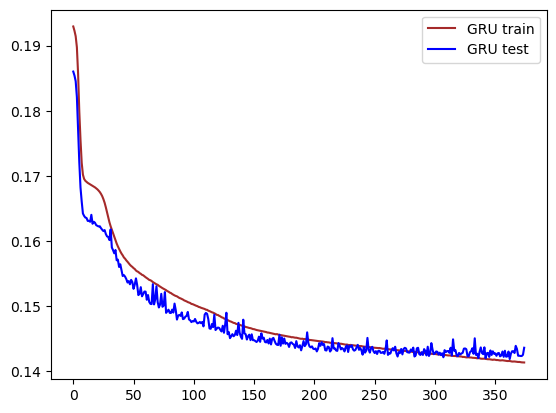

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95061, 1)

In [29]:
pred_y

array([[0.0118802 ],
       [0.02457647],
       [0.00888331],
       ...,
       [0.06661958],
       [0.06757838],
       [0.0688337 ]], dtype=float32)

In [31]:
pred_y=np.reshape(pred_y,95061)

0.14354641226733283
0.22811790055316428
0.37887519352331955
0.2912851301571778


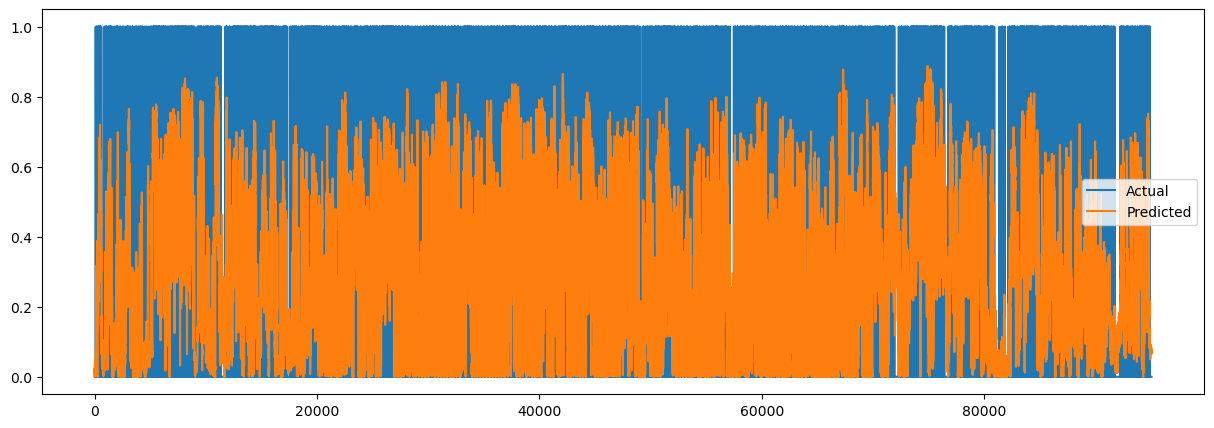

In [32]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [33]:
np.shape(train_X)

(380244, 32, 15)

In [34]:
np.shape(train_y)

(380244, 1)

In [35]:
np.shape(test_X)

(95061, 32, 15)

In [36]:
np.shape(test_y)

(95061, 1)

14854/14854 [==============================] - 90s 6ms/step


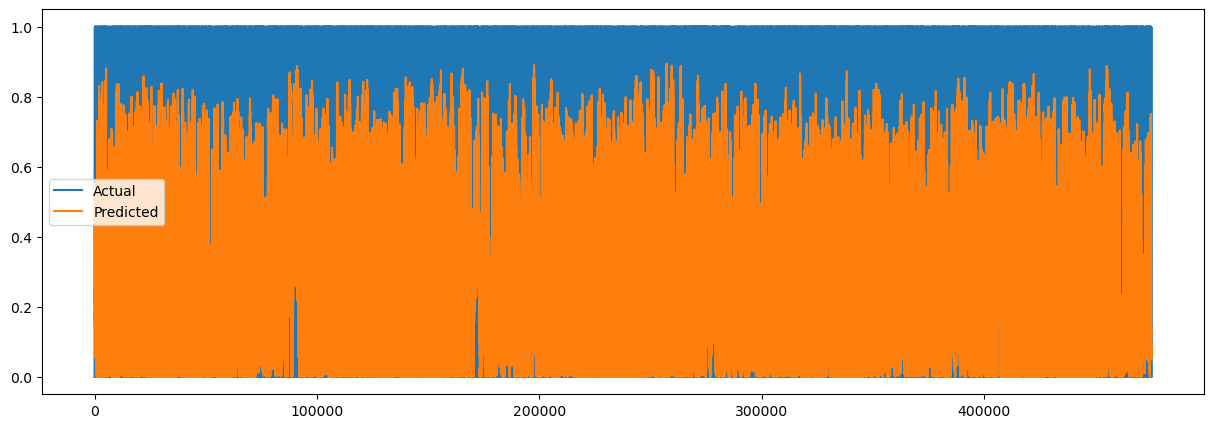

In [37]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

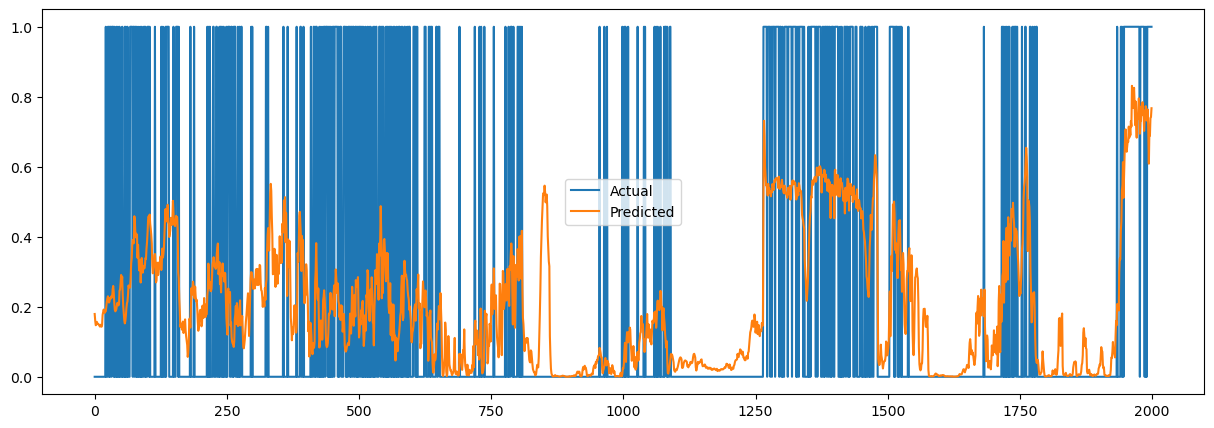

In [38]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [39]:
print(sum(tes)/len(tes))

[0.25795437]


In [40]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.59831155]
[0.83502805]
total acc [0.78423539]


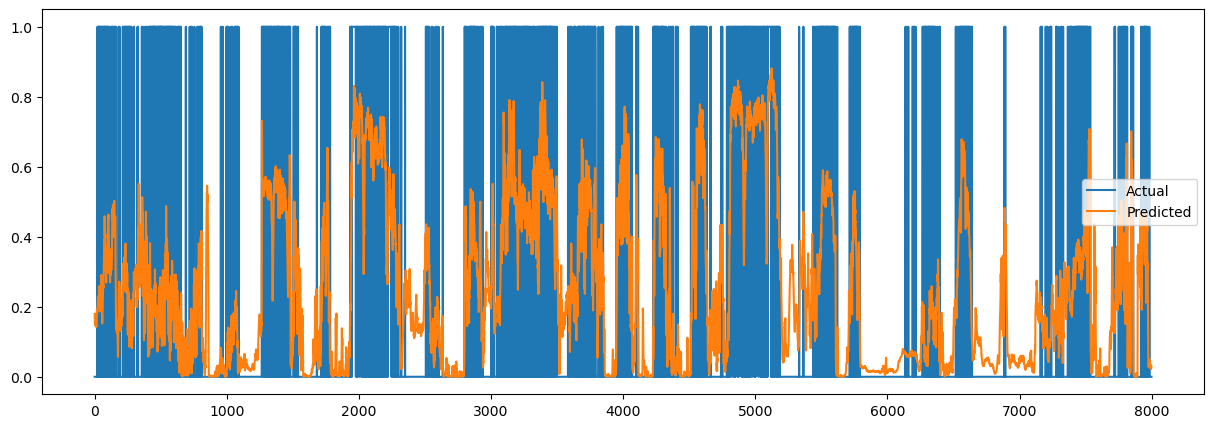

In [41]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

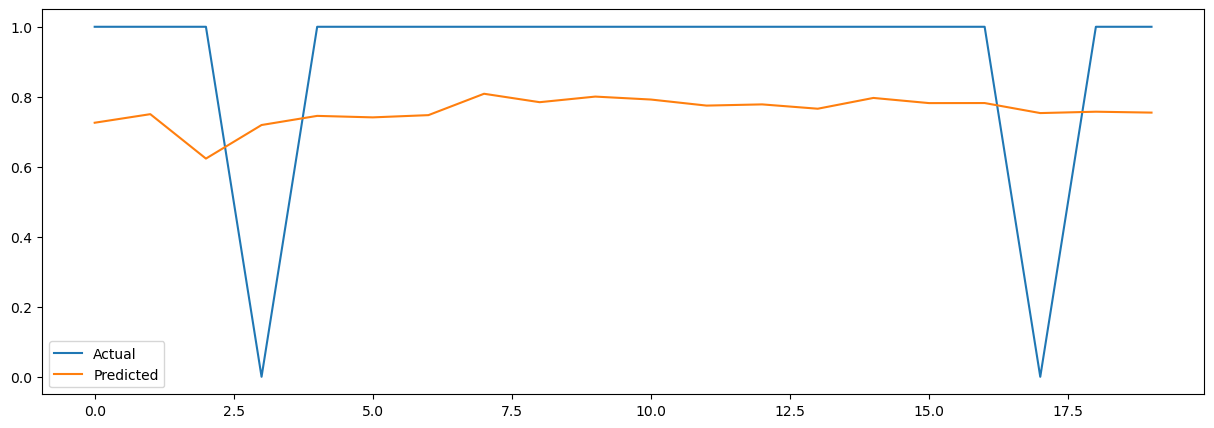

In [42]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

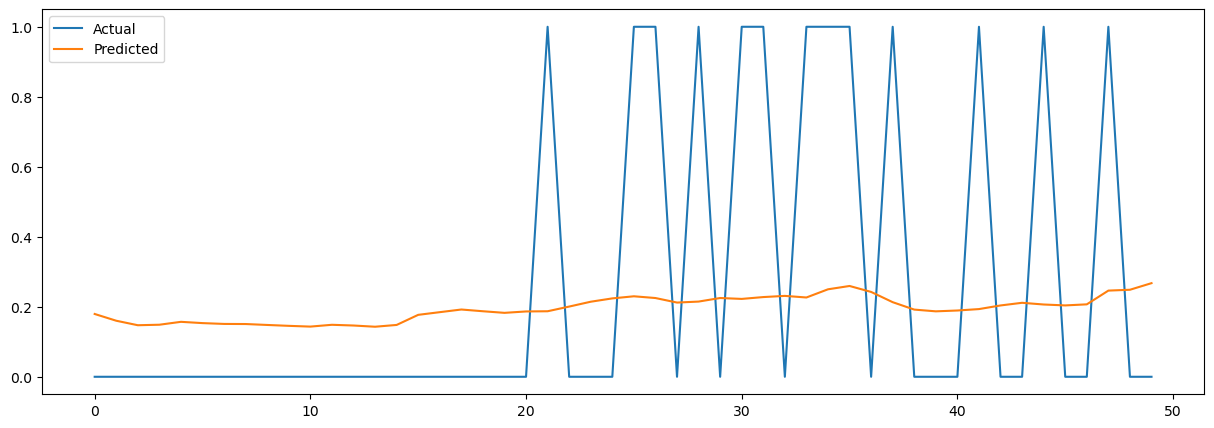

In [43]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

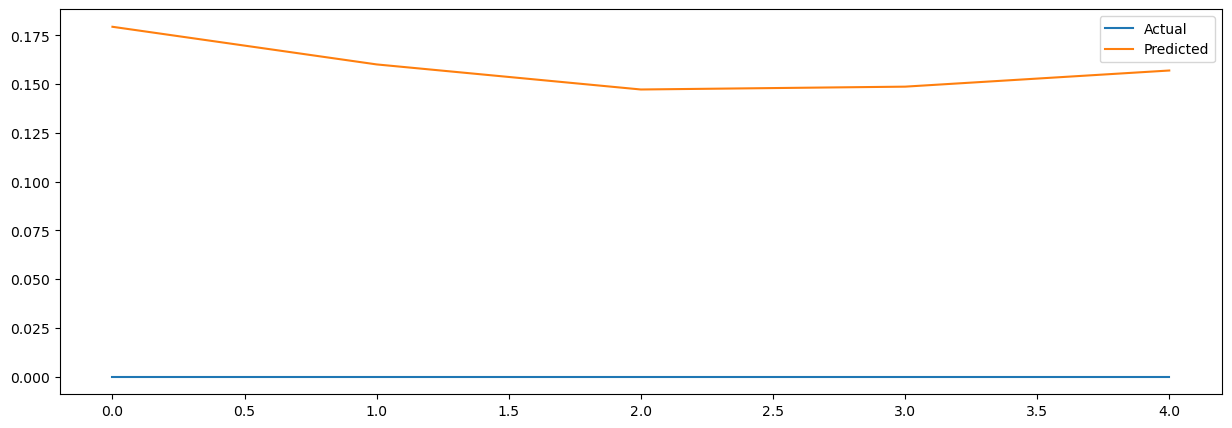

In [44]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()